In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

In [11]:
def plot_beta(a, b, ax=None, xlim=None):
    x = np.linspace(0.0, 1.0, 1000)
    if ax is None:
        ax = plt.subplot()
    f = lambda a, b : stats.beta.pdf(x, a, b)
    y = f(a,b)
    mu = round(stats.beta.mean(a,b), 4)
    plot_pdf = lambda a, b : ax.plot(x, y, 
                                     label=r'$\alpha$={0}, $\beta$={1}'.format(int(a),int(b),mu))

    plot_pdf(a, b)
    if xlim:
        ax.set(xlim=xlim)
    ax.set(xlabel='x', ylabel='f(x)')
    return ax

### Figure 2.1

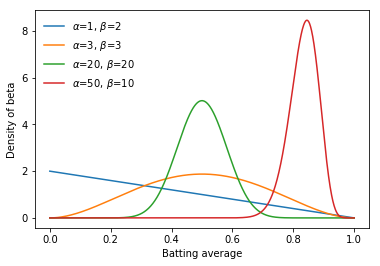

In [16]:
# α = 1, β = 2
# α = 3, β = 3
# α = 20, β = 20 α = 50, β = 10
ax = plt.subplot()
plot_beta(1,2, ax=ax)
plot_beta(3,3, ax=ax)
plot_beta(20,20, ax=ax)
plot_beta(50,10, ax=ax)
plt.legend(loc='best', frameon=False)
ax.set(xlabel='Batting average', ylabel='Density of beta')
plt.show()    

### Figure 2.2

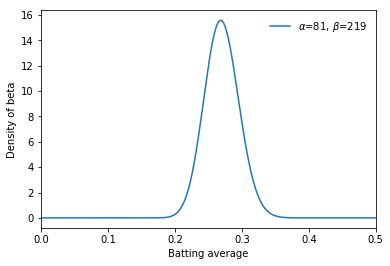

In [18]:
ax = plt.subplot()
plot_beta(81,219, ax=ax, xlim=[0, 0.5])
plt.legend(loc='best', frameon=False)
ax.set(xlabel='Batting average', ylabel='Density of beta')
plt.show()

### Figure 2.3

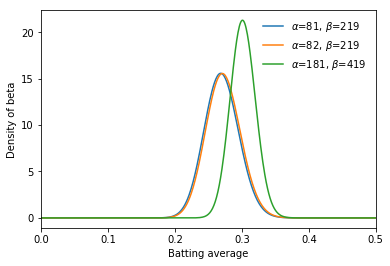

In [19]:
ax = plt.subplot()
plot_beta(81,219, ax=ax, xlim=[0, 0.5])
plot_beta(82,219, ax=ax, xlim=[0, 0.5])
plot_beta(181,419, ax=ax, xlim=[0, 0.5])
plt.legend(loc='best', frameon=False)
ax.set(xlabel='Batting average', ylabel='Density of beta')
plt.show()

### 2.3

In [27]:
num_trials = int(10e6)
true_average = stats.beta.rvs(a=81, b=219, size=num_trials)
hits = stats.binom.rvs(300, true_average, size=num_trials)

In [25]:
true_average[:10]

array([0.30006228, 0.2518912 , 0.3021836 , 0.27817889, 0.28967352,
       0.29521816, 0.25343989, 0.25611028, 0.28421144, 0.28988383])

In [30]:
simulations = pd.DataFrame({'true_average': true_average, 'hits': hits })

In [31]:
simulations.head()

,hits,true_average
0,87,0.277024
1,75,0.246784
2,66,0.243806
3,85,0.243948
4,86,0.272452


In [34]:
hit_100 = simulations.query('hits == 100')
hit_100.head()

,hits,true_average
73,100,0.267102
123,100,0.288463
457,100,0.333517
1030,100,0.308912
1044,100,0.284592


### Figure 2.4

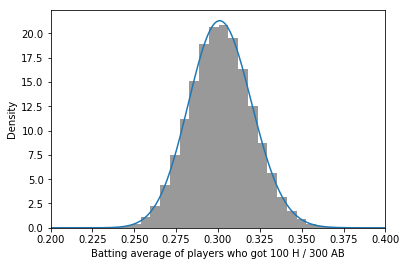

In [48]:
ax = plt.subplot()
plot_beta(181,419, ax=ax, xlim=[0.2, 0.4])
ax.hist(hit_100['true_average'], bins=30, density=True, color='k', alpha=0.4)
ax.set(xlabel='Batting average of players who got 100 H / 300 AB', ylabel='Density')
plt.show()

### Figure 2.5

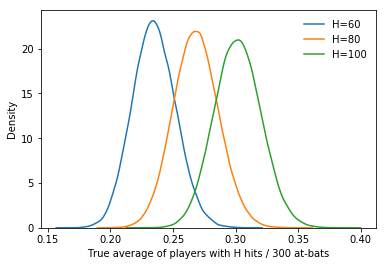

In [52]:
ax = plt.subplot()
hit_records = [60, 80, 100]
for hit_record in hit_records:
    sns.distplot(simulations.query(f'hits == {hit_record}')['true_average'], hist=False, kde=True, label=f'H={hit_record}')
    ax.set(xlabel='True average of players with H hits / 300 at-bats', ylabel='Density')

plt.legend(loc='best', frameon=False)
plt.show()

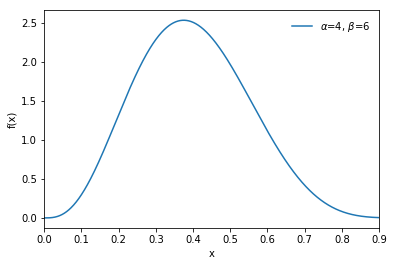

In [68]:
ax = plt.subplot()
plot_beta(4, 6, ax=ax, xlim=[0, 0.9])
# plot_beta(300, 700, ax=ax, xlim=[0, 0.9])
plt.legend(loc='best', frameon=False)
plt.show()

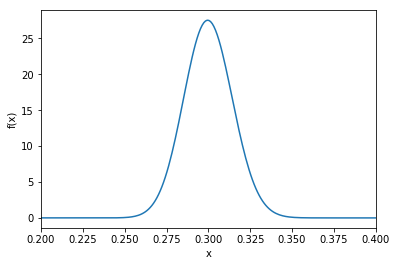

In [66]:
plot_beta(300, 700, xlim=[0.2, 0.4]);

### Figure 6.2

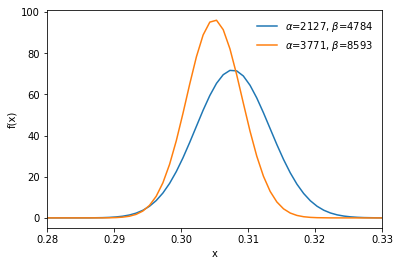

In [83]:
aaron_alpha, aaron_beta = 3771, (12364-3771)
piazza_alpha, piazza_beta = 2127, (6911-2127)

ax = plt.subplot()
plot_beta(piazza_alpha, piazza_beta, ax=ax, xlim=[0.28, 0.33])
plot_beta(aaron_alpha, aaron_beta, ax=ax, xlim=[0.28, 0.33])
plt.legend(loc='best', frameon=False)
plt.show()

In [104]:
num_trials = 1000000
np.random.seed = 42
piazza_simulation = stats.beta.rvs(piazza_alpha, piazza_beta, size=num_trials) 
aaron_simulation = stats.beta.rvs(aaron_alpha, aaron_beta, size=num_trials) 

In [105]:
piazza_simulation[:10]

array([0.30553409, 0.31326497, 0.30654482, 0.31301598, 0.31030685,
       0.31005334, 0.31185849, 0.30690007, 0.31141569, 0.30423584])

In [106]:
sim = np.mean(piazza_simulation > aaron_simulation)

In [107]:
sim

0.654928